# Poincare Boundary Condition

Most of the tutorials use last closed flux surface (LCFS) as the boundary condition for 3D equilibrium. This tutorial will cover another way to define boundary condition using DESC.

In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../../"))

Import required stuff.

In [2]:
%matplotlib inline
import numpy as np
from desc.objectives import (
    ObjectiveFunction,
    ForceBalance,
    get_fixed_boundary_constraints,
)
from desc.examples import get
from desc.optimize import Optimizer
from desc.plotting import plot_comparison

DESC version 0.10.4+63.g43c2eb97.dirty,using JAX backend, jax version=0.4.14, jaxlib version=0.4.14, dtype=float64
Using device: CPU, with 8.59 GB available memory


### Solving Poincare Boundary Condition from an existing equilibrium

To first show that Poincare BC gives the same result with LCFS, let's set our optimization problem by taking the $\zeta$=0 Poincare cross-section of Heliotron equilibrium.

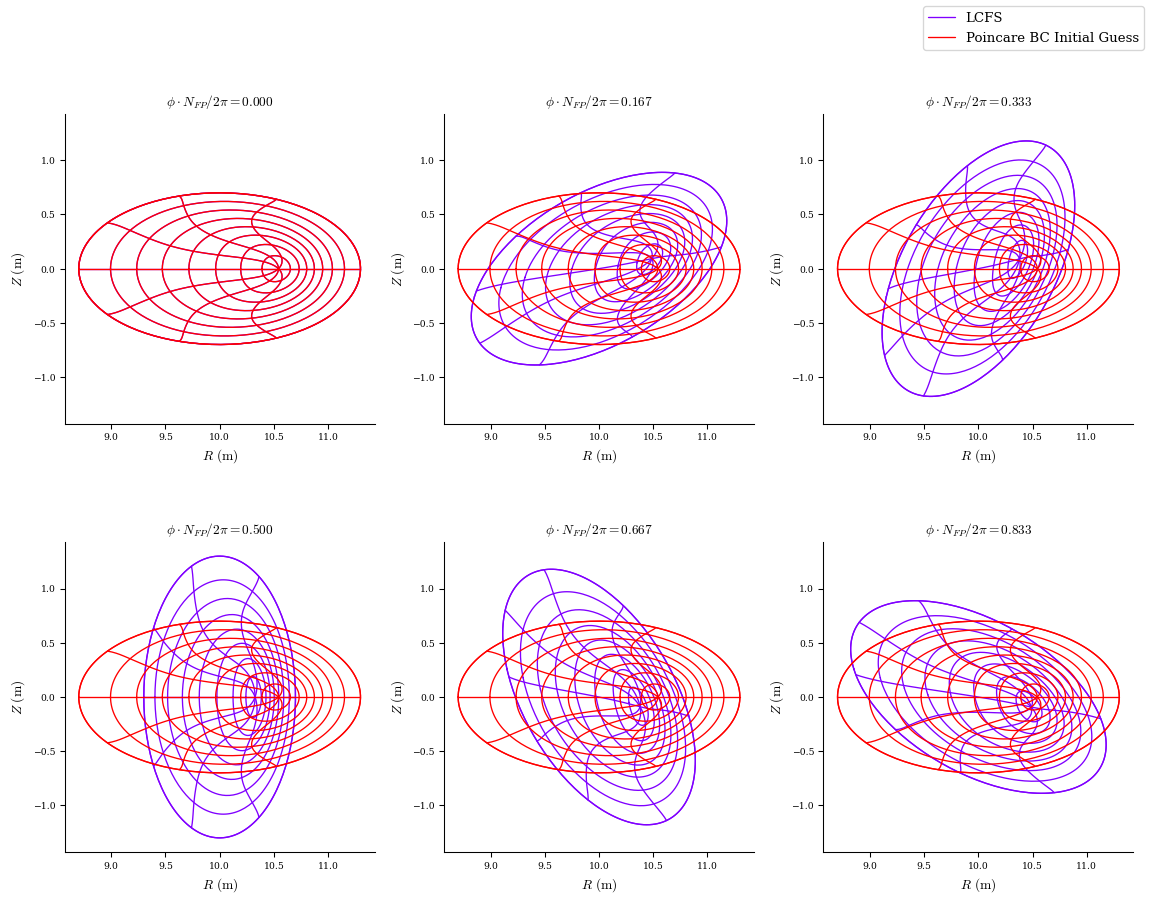

In [3]:
eq = get("HELIOTRON")
zeta = 0
eq_poin = eq.set_poincare_equilibrium(zeta=zeta)

plot_comparison(eqs=[eq,eq_poin],labels=['LCFS',f'Poincare BC Initial Guess']);

We can also choose $\zeta = \pi$ as the boundary condition and set it from an existing equilibrium.

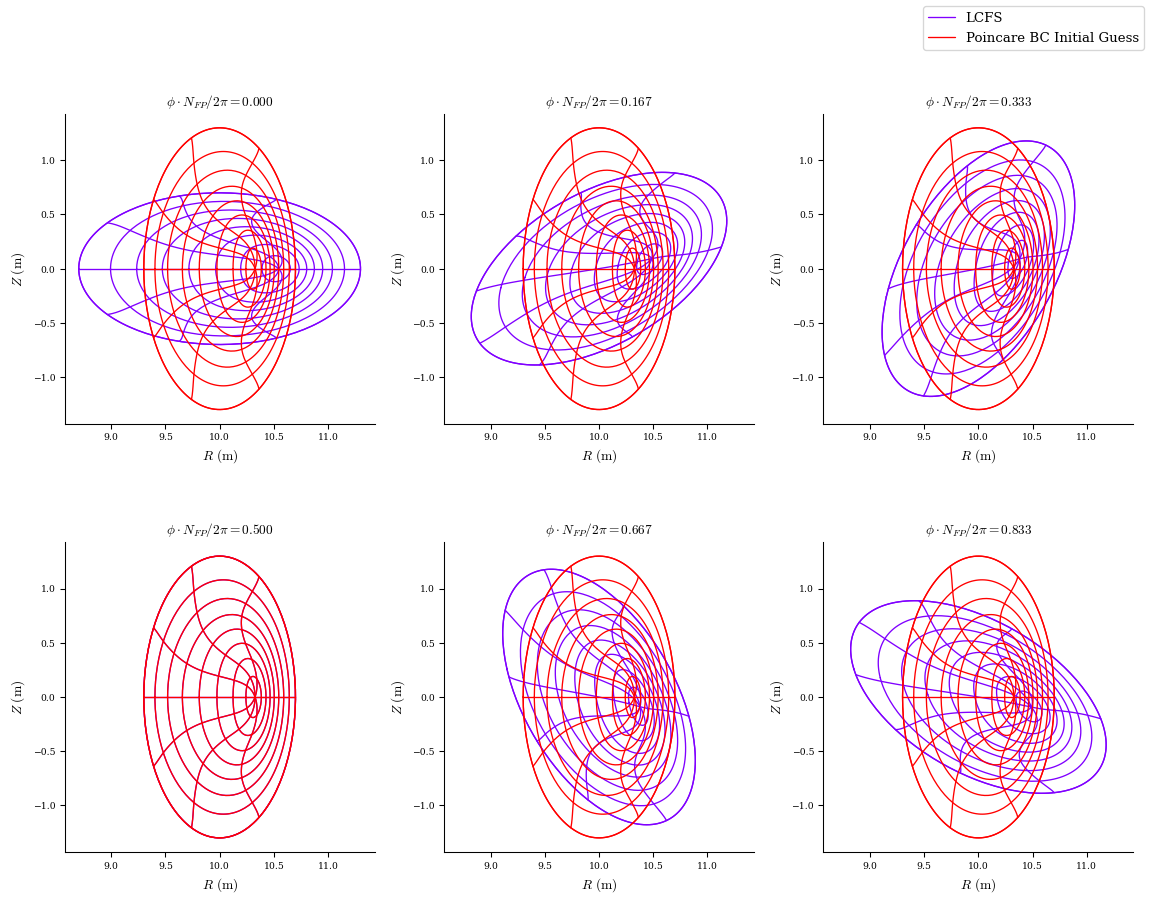

In [4]:
eq = get("HELIOTRON")
zeta = np.pi
eq_poin = eq.set_poincare_equilibrium(zeta=zeta)

plot_comparison(eqs=[eq,eq_poin],labels=['LCFS',f'Poincare BC Initial Guess']);

Now, we can solve the newly created 'eq_poin' as usual. The code will apply some checks to see if you are trying to solve a Poincare BC problem or LCFS. Then, add the required constraints and objectives before sending it to the optimizer.

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 134 ms
Timer: Objective build = 339 ms
Timer: Linear constraint projection build = 1.74 sec
Compiling objective function and derivatives: ['force']
Timer: Objective compilation time = 1.09 sec
Timer: Jacobian compilation time = 3.80 sec
Timer: Total compilation time = 4.90 sec
Number of parameters: 1521
Number of objectives: 4940
Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1          9.244e-02                                    2.730e+01   
       1              5          4.882e-02      4.362e-02      3.830e-02      5.020e+01   
       2              7          2.702e-02      2.180e-02      1.873e-02      4.487e+00   
       3              8          1.361e-02      1.340e-02      3.481e-02      1.430e+00   
       4              9          5.579e-03      8.035e-03      8.348e-02      1.065e

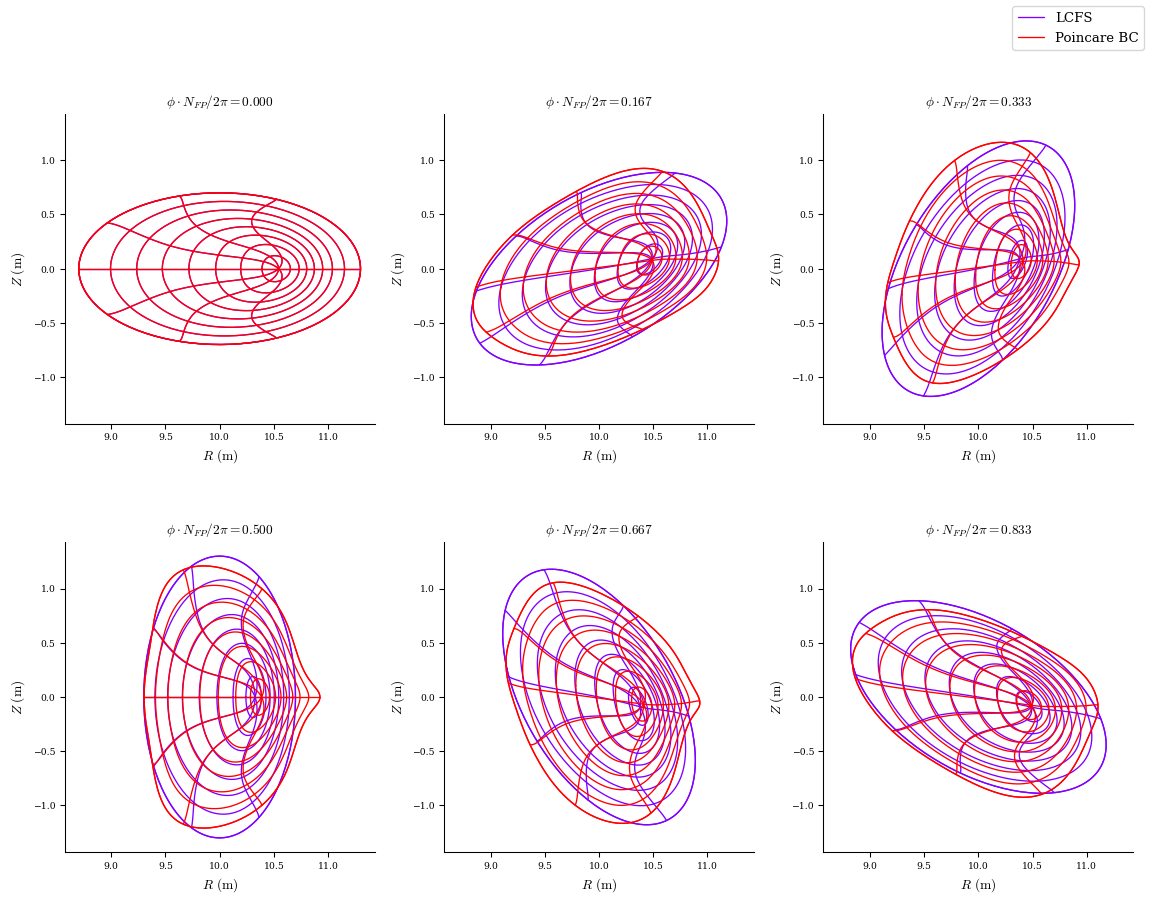

In [6]:
eq = get("HELIOTRON")
zeta = 0
eq_poin = eq.set_poincare_equilibrium(zeta=zeta)

constraints = get_fixed_boundary_constraints(eq=eq_poin)
objective = ObjectiveFunction(ForceBalance(eq_poin))
optimizer = Optimizer("lsq-exact")

eq_poin.solve(verbose=3, ftol=0, objective=objective, constraints=constraints, optimizer=optimizer,maxiter=100, xtol=0)
plot_comparison(eqs=[eq,eq_poin],labels=['LCFS',f'Poincare BC']);

### Creating a new Poincare surface to fix 

We can also create a new surface object called "PoincareSurface" to set our optimization problem as LCFS.